In [3]:
from google.colab import drive
drive.mount('/gdrive')

!pwd
%cd '/gdrive/My Drive/Colab Notebooks/ICS506_Project'
!ls

Mounted at /gdrive
/content
/gdrive/My Drive/Colab Notebooks/ICS506_Project
Dataset				    TextClassification_Dataset.csv
Dataset.zip			    TextClassification__Main.csv
ICS506_Project_Preprocessing.ipynb  text_classifier
Models.ipynb			    text_clf_LR.pkl
TextClassificaition.csv


In [4]:
import pandas as pd
df = pd.read_csv('TextClassification__Main.csv')
df.head()

,label,X,Y
0,Medical,رأس الخيمة عدنان عكاشة قال د عبد الله النع...,2
1,Finance,انخفض مؤشر سوق الإمارات منذ بداية العام الحالي...,1
2,Sports,أهدى الرئيس الشيشاني رمضان قديروف النجم المصري...,5
3,Politics,أعلن مكتب الملكة رانيا عقيلة العاهل الأردني ال...,3
4,Religion,حوار جمال سالم يعد المستعرب والمستشرق الروسي ...,4


# Machine Learning

In [5]:

#Import libraries
!pip install utils

import os
from keras.models import Model
from keras.utils import np_utils
from keras.callbacks import Callback
from gensim.models.keyedvectors import KeyedVectors
from time import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
from keras.layers import Embedding, Dense, Dropout, Input#, LSTM, Bidirectional
from keras.layers import MaxPooling1D, Conv1D, Flatten, LSTM
from keras.preprocessing import sequence#, text
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import text
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix as confmat,
    classification_report as creport
)
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
X_cla = df['X'] 
y_cla = df['Y']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_cla, y_cla, test_size=0.25, random_state=42)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

X_train_tfidf = vectorizer.fit_transform(X_train) 
X_train_tfidf.shape

(34113, 372871)

## Logistic Reg

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


text_clf_LR = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LogisticRegression(penalty='none', solver='newton-cg')),])

text_clf_LR.fit(X_train, y_train)

predictions = text_clf_LR.predict(X_test)

In [24]:
from sklearn import metrics
# from sklearn.metrics import recall_score
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       644
           1       0.99      0.98      0.99       634
           2       0.99      0.98      0.99       655
           3       0.98      0.99      0.99       673
           4       0.98      0.97      0.97       661
           5       0.99      0.99      0.99       676
           6       0.97      0.99      0.98       606

    accuracy                           0.98      4549
   macro avg       0.98      0.98      0.98      4549
weighted avg       0.98      0.98      0.98      4549



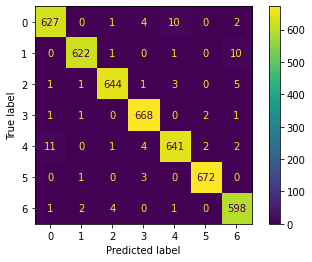

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier
# >>> neigh = KNeighborsClassifier(n_neighbors=3)

text_clf_KNN = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', KNeighborsClassifier()),])

text_clf_KNN.fit(X_train, y_train)

predictions = text_clf_KNN.predict(X_test)

In [27]:
from sklearn import metrics
from sklearn.metrics import recall_score
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       644
           1       0.96      0.99      0.97       634
           2       0.96      0.94      0.95       655
           3       0.96      0.91      0.93       673
           4       0.88      0.94      0.91       661
           5       0.99      0.98      0.99       676
           6       0.91      0.97      0.94       606

    accuracy                           0.94      4549
   macro avg       0.94      0.94      0.94      4549
weighted avg       0.94      0.94      0.94      4549



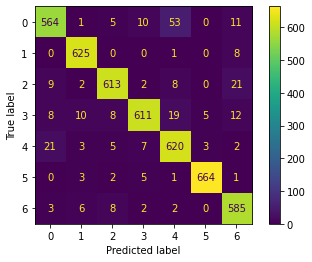

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

## Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
# >>> neigh = KNeighborsClassifier(n_neighbors=3)

text_clf_DT = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', DecisionTreeClassifier()),])

text_clf_DT.fit(X_train, y_train)

predictions = text_clf_DT.predict(X_test)

In [30]:
from sklearn import metrics
from sklearn.metrics import recall_score
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       644
           1       0.92      0.92      0.92       634
           2       0.92      0.89      0.91       655
           3       0.85      0.88      0.87       673
           4       0.89      0.88      0.88       661
           5       0.95      0.93      0.94       676
           6       0.83      0.86      0.84       606

    accuracy                           0.89      4549
   macro avg       0.89      0.89      0.89      4549
weighted avg       0.89      0.89      0.89      4549



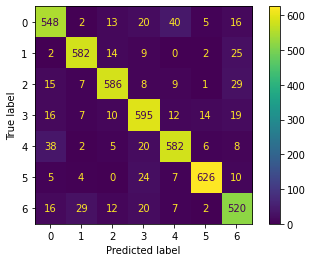

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Deep Learning

In [32]:
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
print('Done')

Done


In [33]:
df.head()

,label,X,Y
0,Medical,رأس الخيمة عدنان عكاشة قال د عبد الله النع...,2
1,Finance,انخفض مؤشر سوق الإمارات منذ بداية العام الحالي...,1
2,Sports,أهدى الرئيس الشيشاني رمضان قديروف النجم المصري...,5
3,Politics,أعلن مكتب الملكة رانيا عقيلة العاهل الأردني ال...,3
4,Religion,حوار جمال سالم يعد المستعرب والمستشرق الروسي ...,4


In [34]:
df['label'].unique()

array(['Medical', 'Finance', 'Sports', 'Politics', 'Religion', 'Tech',
       'Culture'], dtype=object)

In [35]:
df.groupby('label').nunique()


,X,Y
label,,
Culture,6495,1
Finance,6499,1
Medical,6500,1
Politics,6499,1
Religion,6493,1
Sports,6499,1
Tech,6500,1


In [36]:
train = df[['X','label']]
train.head()

,X,label
0,رأس الخيمة عدنان عكاشة قال د عبد الله النع...,Medical
1,انخفض مؤشر سوق الإمارات منذ بداية العام الحالي...,Finance
2,أهدى الرئيس الشيشاني رمضان قديروف النجم المصري...,Sports
3,أعلن مكتب الملكة رانيا عقيلة العاهل الأردني ال...,Politics
4,حوار جمال سالم يعد المستعرب والمستشرق الروسي ...,Religion


In [37]:
train["X"].isnull().sum()

0

In [38]:
temp = []
#Splitting pd.Series to list
data_to_list = train['X'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(data_to_list[i])
list(temp[:1])


['رأس الخيمة   عدنان عكاشة قال د   عبد الله النعيمي  مدير منطقة رأس الخيمة الطبية  إن نسبة الإنجاز في مشروع إحلال مركز الجير للرعاية الصحية الأولية  الذي يعد من أقدم المراكز الصحية في الإمارة  حيث افتتح عام  1974 بلغت 75   ومن المتوقع الانتهاء من تشييد المركز الجديد في يوليو  تموز المقبل  ويعد المبنى الحالي للمركز  الذي يتواصل العمل فيه مؤقتا  إلى حين الانتهاء من مشروع الإحلال  ويصل عمره إلى 41 عاما   عبارة عن مسكن شعبي قديم  ووفقا  للدكتور النعيمي  سيكون المركز  الذي يقع المركز في منطقة الجير  نحو 40 كيلومترا شمال مركز مدينة رأس الخيمة  من أكبر المراكز الصحية التابعة لمنطقة رأس الخيمة الطبية  ويتكون من مبنى رئيسي يتألف من دور واحد  ويضم 22 حجرة وعيادة  ويشتمل المركز  في محيطه الخارجي  على غرف خاصة للحراسة وخدمات الكهرباء والخدمات الصحية  الميكانيكية  ومواقف للسيارات تستوعب 93 مركبة  منها 18 موقفا  مظللا   وأخرى غير مظللة تتسع ل 75 سيارة  ومساحات خضراء  ووفقا لمصادر مختصة  تبلغ التكلفة الإجمالية للمشروع 8 ملايين و670 ألف درهم  وينفذ في موقع مجاور لأحد جبال المنطقة  وعلى مسافة قريبة من 

In [39]:
data = np.array(temp)


In [40]:
labels = np.array(train['label'])
y = []

for i in range(len(labels)):
    if labels[i] == 'Culture':
        y.append(0)
    if labels[i] == 'Finance':
        y.append(1)
    if labels[i] == 'Medical':
        y.append(2)
    if labels[i] == 'Politics':
        y.append(3)
    if labels[i] == 'Religion':
        y.append(4)
    if labels[i] == 'Sports':
        y.append(5)
    if labels[i] == 'Tech':
        y.append(6)

y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 7, dtype="float32")
del y

In [41]:
len(labels),len(data)

(45485, 45485)

In [42]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
Temp = pad_sequences(sequences, maxlen=max_len)

[[   0    0    0 ...  121 1551 3733]
 [2131  643 1823 ... 1861   29 1142]
 [   0    0    0 ... 1118  527   71]
 ...
 [   0    0    0 ...  254  253 1968]
 [ 104    1 1196 ... 4813 2837 2055]
 [   0    0    0 ...  574  464  131]]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(Temp,labels,test_size = 0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test,y_test,test_size = 0.5, random_state=42)
print (len(X_train),len(y_train),'\n',len(X_test),len(y_test))
print (len(X_val),len(y_val))

36388 36388 
 4548 4548
4549 4549


## Single LSTM Layer

In [44]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(7,activation='softmax'))

model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
history = model1.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[])

Epoch 1/10
1138/1138 [==============================] - 28s 17ms/step - loss: 1.1305 - accuracy: 0.5885 - val_loss: 0.5069 - val_accuracy: 0.8962
Epoch 2/10
1138/1138 [==============================] - 13s 12ms/step - loss: 0.3696 - accuracy: 0.9064 - val_loss: 0.3360 - val_accuracy: 0.9230
Epoch 3/10
1138/1138 [==============================] - 15s 13ms/step - loss: 0.2517 - accuracy: 0.9374 - val_loss: 0.2377 - val_accuracy: 0.9455
Epoch 4/10
1138/1138 [==============================] - 20s 18ms/step - loss: 0.2073 - accuracy: 0.9474 - val_loss: 0.2262 - val_accuracy: 0.9444
Epoch 5/10
1138/1138 [==============================] - 14s 13ms/step - loss: 0.1782 - accuracy: 0.9553 - val_loss: 0.1946 - val_accuracy: 0.9545
Epoch 6/10
1138/1138 [==============================] - 18s 16ms/step - loss: 0.1666 - accuracy: 0.9582 - val_loss: 0.2001 - val_accuracy: 0.9521
Epoch 7/10
1138/1138 [==============================] - 15s 13ms/step - loss: 0.1498 - accuracy: 0.9621 - val_loss: 0.1919 -

In [47]:
model1.evaluate(X_test, y_test)

143/143 [==============================] - 1s 8ms/step - loss: 0.1670 - accuracy: 0.9598


[0.16704599559307098, 0.9597625136375427]

## Bidirectional Layer

In [48]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.4)))
model2.add(layers.Dense(7,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[])

Epoch 1/10
1138/1138 [==============================] - 27s 19ms/step - loss: 0.7965 - accuracy: 0.7116 - val_loss: 0.2758 - val_accuracy: 0.9233
Epoch 2/10
1138/1138 [==============================] - 21s 19ms/step - loss: 0.2178 - accuracy: 0.9373 - val_loss: 0.1858 - val_accuracy: 0.9505
Epoch 3/10
1138/1138 [==============================] - 26s 23ms/step - loss: 0.1535 - accuracy: 0.9583 - val_loss: 0.1794 - val_accuracy: 0.9556
Epoch 4/10
1138/1138 [==============================] - 20s 18ms/step - loss: 0.1280 - accuracy: 0.9658 - val_loss: 0.1504 - val_accuracy: 0.9595
Epoch 5/10
1138/1138 [==============================] - 20s 18ms/step - loss: 0.1133 - accuracy: 0.9686 - val_loss: 0.1615 - val_accuracy: 0.9611
Epoch 6/10
1138/1138 [==============================] - 20s 18ms/step - loss: 0.1007 - accuracy: 0.9719 - val_loss: 0.1658 - val_accuracy: 0.9560
Epoch 7/10
1138/1138 [==============================] - 20s 18ms/step - loss: 0.0898 - accuracy: 0.9747 - val_loss: 0.1658 -

In [49]:
model2.evaluate(X_test, y_test)

143/143 [==============================] - 1s 9ms/step - loss: 0.1682 - accuracy: 0.9633


[0.16816940903663635, 0.9632805585861206]

## Transformer

In [50]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [54]:
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super(TransformerBlock, self).__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    def call(self, inputs, training):
        attn_output = self.att(inputs, inputs)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

In [55]:
class TokenAndPositionEmbedding(layers.Layer):
    def __init__(self, maxlen, vocab_size, embed_dim):
        super(TokenAndPositionEmbedding, self).__init__()
        self.token_emb = layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)
        self.pos_emb = layers.Embedding(input_dim=maxlen, output_dim=embed_dim)

    def call(self, x):
        maxlen = tf.shape(x)[-1]
        positions = tf.range(start=0, limit=maxlen, delta=1)
        positions = self.pos_emb(positions)
        x = self.token_emb(x)
        return x + positions

In [56]:
vocab_size = 5000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

# (x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(num_words=vocab_size)
print(len(X_train), "Training sequences")
print(len(X_test), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)

36388 Training sequences
4548 Validation sequences


In [57]:
embed_dim = 32  # Embedding size for each token
num_heads = 2  # Number of attention heads
ff_dim = 32  # Hidden layer size in feed forward network inside transformer

inputs = layers.Input(shape=(maxlen,))
embedding_layer = TokenAndPositionEmbedding(maxlen, vocab_size, embed_dim)
x = embedding_layer(inputs)
transformer_block = TransformerBlock(embed_dim, num_heads, ff_dim)
x = transformer_block(x)
x = layers.GlobalAveragePooling1D()(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(20, activation="relu")(x)
x = layers.Dropout(0.1)(x)
outputs = layers.Dense(7, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

In [58]:
model.compile(optimizer="rmsprop", loss="CategoricalCrossentropy", metrics=["accuracy"])
history = model.fit(
    X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val)
)

Epoch 1/10
1138/1138 [==============================] - 15s 10ms/step - loss: 0.3473 - accuracy: 0.8914 - val_loss: 0.1586 - val_accuracy: 0.9580
Epoch 2/10
1138/1138 [==============================] - 10s 9ms/step - loss: 0.1133 - accuracy: 0.9686 - val_loss: 0.0971 - val_accuracy: 0.9738
Epoch 3/10
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0908 - accuracy: 0.9747 - val_loss: 0.1058 - val_accuracy: 0.9699
Epoch 4/10
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0782 - accuracy: 0.9794 - val_loss: 0.1043 - val_accuracy: 0.9721
Epoch 5/10
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0699 - accuracy: 0.9805 - val_loss: 0.1086 - val_accuracy: 0.9727
Epoch 6/10
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0645 - accuracy: 0.9825 - val_loss: 0.1144 - val_accuracy: 0.9732
Epoch 7/10
1138/1138 [==============================] - 10s 9ms/step - loss: 0.0583 - accuracy: 0.9846 - val_loss: 0.1129 - val_a

In [59]:
model.evaluate(X_test, y_test)

143/143 [==============================] - 1s 5ms/step - loss: 0.1924 - accuracy: 0.9659


[0.19237005710601807, 0.9659190773963928]

# Make Prediction

In [1]:
def print_Class(x):
  if x == 0:
    print("التصنيف: ثقافة")

  elif x == 1:
    print("التصنيف: مالية")

  elif x == 2:
    print("التصنيف: طبي")

  elif x == 3:
    print("التصنيف: سياسي")

  elif x == 4:
    print("التصنيف: ديني")

  elif x == 5:
    print("التصنيف: رياضة")

  elif x == 6:
    print("التصنيف: تقني")


In [13]:
Your_Text = "والالتهاب الكبدي الفيروسي يصيب الجسم باليرقان jaundice (صفرة الجلد) ولاسيما لدي الأطفال. هناك خمسة أنواع من الالتهاب الكبدي هم(أ، ب، ج، د، هـ) كما توجد أنواع أخرى غير مصنفة أو غير واضحة الارتباط بالمرض مثل فيروس التهاب الكبد G. بعض الأنواع تنتقل بالاتصال الجنسي، والسبب الشائع في موت المرضي بالفيروسات الكبدية الفشل الكبدي الحاد مما يؤدي للغيبوبة والموت. يكون الالتهاب لدى الأطفال أقل حدة لكنه قد يولد فيما بعد تليف كبدي وتلفا بأنسجة الكبد أو الفشل الكبدي. ولا يوجد علاج خاص للالتهاب الكبدي الفيروسي. عندما يصاب الكبد بالالتهاب الكبد الفيروسي viral تموت خلاياه قد يؤدي إلى مضاعفات مختلفة، فقد يصاب المريض بالنزيف المتكرر نظراً لقلة إفراز الكبد لعوامل التجلط . ينتقل الالتهاب الكبدي أ عن طريق ملامسة براز وبول ولعاب المريض. والالتهاب الكبدي بفيروس التهاب الكبد ب وج ود ينتقلان من عمليات نقل الدم."




print_Class(text_clf_LR.predict([Your_Text])[0])

التصنيف: طبي
